In [118]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [119]:
# Load the dataset
data = np.loadtxt('./ex2data1.txt', delimiter=',')

# X = np.transpose(np.array(cols[:-1]))
# y = np.transpose(np.array(cols[-1:]))
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]
m = y.size # number of training examples

# Xbar = np.insert(X,0,1,axis=1)
Xbar = X


In [120]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [121]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [122]:
def h(theta, X):
    return sigmoid(np.dot(X, theta))

In [123]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
#     print(X.dot(theta))
#     print(X.shape)
#     print(y.shape)
#     print(X.dot(theta).shape)
#     print(np.log(h))
#     print(y)
    J = (-1 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
#     print(J)
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [124]:
def gradient(theta, X, y):
    m = y.size
    # theta is a 1-d array (shape is (n,)), hence we need to
    # reshape theta so that it becomes a nx1 vector (n: number of features) (shape is (n,1))
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad =(1/m)*(X.T.dot(h-y))
    return grad.flatten()

In [125]:
#Insert the usual column of 1's into the "X" matrix
initial_theta = np.zeros(Xbar.shape[1])

# initial_theta = np.array([-24, 0.2, 0.2])
cost = costFunction(initial_theta, Xbar, y)
grad = gradient(initial_theta, Xbar, y)
print('Cost: ', cost)
print('Gradient descent: ', grad)

Cost:  0.6931471805599453
Gradient descent:  [ -0.1        -12.00921659 -11.26284221]


In [126]:
res = minimize(costFunction, initial_theta, args = (Xbar, y), method = None, jac = gradient, options = {'maxiter':400})
res

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557620e-09,  4.36433485e-07, -1.39671757e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [127]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(np.dot(X, theta)) >= threshold
    return(p.astype('int'))

In [128]:
# print(res.x.shape)
# print(np.array([1,45,86]).shape)
sigmoid(np.dot(np.array([1, 45, 85]),res.x))

0.7762903249331021

In [129]:
p = predict(res.x, Xbar) 
print('Train accuracy {}%'.format(100 * sum(p == y.ravel()) / p.size))

Train accuracy 89.0%


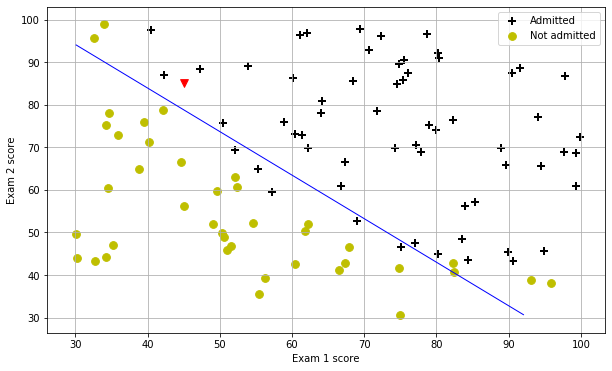

In [131]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');